In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/esgc

/content/drive/MyDrive/Colab Notebooks/esgc


In [4]:
!pwd

/content/drive/MyDrive/Colab Notebooks/esgc


### 목표
- 이미지 데이터를 분류하는 딥러닝 모델 설계 해보기

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from tensorflow.keras.datasets import mnist

In [7]:
# 데이터 로드
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
# 모양 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# X_train : 60000장의 데이터, 1장당 28*28

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

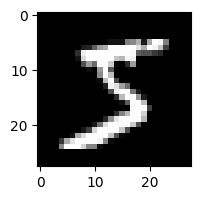

In [9]:
# 문제데이터 1ea 확인
plt.figure(figsize= (2, 2))
plt.imshow(X_train[0], cmap = "gray")

plt.show()

In [10]:
# 정답데이터 1ea 확인
y_train[10]

np.uint8(3)

In [11]:
np.unique(y_train) # 총 10개의 클래스

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
X_train[0][0][0]
# 0 : 검정색
# 255 : 흰색

np.uint8(0)

## MLP 모델링

In [13]:
# 필요한 라이브러리 호출
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten

# Flatten : 다차원 구조를 1차원으로 변경(차원축소) -> Dense가 1D만 입력으로 허용하기 때문

In [14]:
# 신경망 구조 설계

# 뼈대
model = Sequential()

# 입력층
model.add(InputLayer(shape= (28, 28))) # 데이터 1개의 모양을 지정

# 은닉층
model.add(Flatten()) # 1차원으로 변환
model.add(Dense(32, activation= "relu"))
model.add(Dense(64, activation= "relu"))
model.add(Dense(128, activation= "relu"))
model.add(Dense(64, activation= "relu"))
model.add(Dense(32, activation= "relu"))

# 출력층
model.add(Dense(10, activation= "softmax")) # 각각의 클래스에 대한 확률값을 계산하는 도구(총합이 1이 되도록)

In [15]:
# 학습 방법 설정
model.compile(loss = "sparse_categorical_crossentropy",  # 정답 데이터가 1차원인 경우
                                                         # 정답 데이터가 2차원 이상인 경우(원핫인코딩 되어있는 데이터) -> categorical_crossentropy
              optimizer = "adam",
              metrics = ["accuracy"])

In [16]:
# 학습
h = model.fit(X_train, y_train, validation_split= 0.2, epochs= 20)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6741 - loss: 1.4009 - val_accuracy: 0.9033 - val_loss: 0.3292
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9206 - loss: 0.2858 - val_accuracy: 0.9317 - val_loss: 0.2471
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9405 - loss: 0.2083 - val_accuracy: 0.9427 - val_loss: 0.2000
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9494 - loss: 0.1748 - val_accuracy: 0.9536 - val_loss: 0.1682
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9531 - loss: 0.1582 - val_accuracy: 0.9556 - val_loss: 0.1663
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9628 - loss: 0.1289 - val_accuracy: 0.9567 - val_loss: 0.1542
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9656 - loss: 0.1217 - val_accuracy: 0.9598 - val_loss: 0.1476
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9702 - loss: 0.1015 - 

In [17]:
# 신경망 구조 설계

# 뼈대
model = Sequential()

# 입력층
model.add(InputLayer(shape= (28, 28))) # 데이터 1개의 모양을 지정

# 은닉층
model.add(Flatten()) # 1차원으로 변환
model.add(Dense(32, activation= "relu"))
model.add(Dense(64, activation= "relu"))
model.add(Dense(128, activation= "relu"))
model.add(Dense(64, activation= "relu"))
model.add(Dense(32, activation= "relu"))

# 출력층
model.add(Dense(10, activation= "softmax")) # 각각의 클래스에 대한 확률값을 계산하는 도구(총합이 1이 되도록)

In [18]:
# 학습 방법 설정
model.compile(loss = "sparse_categorical_crossentropy",  # 정답 데이터가 1차원인 경우
                                                         # 정답 데이터가 2차원 이상인 경우(원핫인코딩 되어있는 데이터) -> categorical_crossentropy
              optimizer = "adam",
              metrics = ["accuracy"])

In [19]:
# 학습
h = model.fit(X_train, y_train, validation_split= 0.2, epochs= 20)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6985 - loss: 1.6316 - val_accuracy: 0.9047 - val_loss: 0.3659
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9212 - loss: 0.2837 - val_accuracy: 0.9364 - val_loss: 0.2291
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9383 - loss: 0.2162 - val_accuracy: 0.9476 - val_loss: 0.1942
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9483 - loss: 0.1806 - val_accuracy: 0.9473 - val_loss: 0.2012
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9560 - loss: 0.1504 - val_accuracy: 0.9513 - val_loss: 0.1705
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9615 - loss: 0.1365 - val_accuracy: 0.9560 - val_loss: 0.1643
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9650 - loss: 0.1221 - val_accuracy: 0.9553 - val_loss: 0.1627
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9697 - loss: 0.1066 -

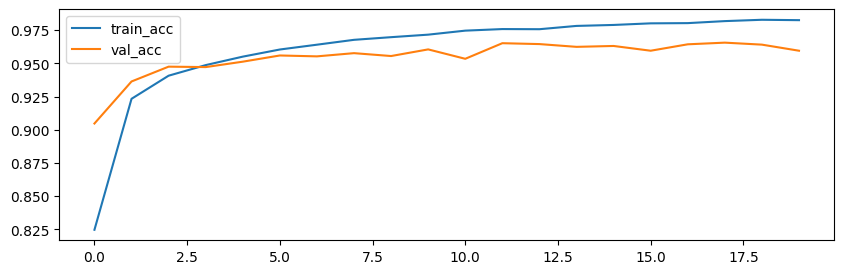

In [20]:
# 학습 결과 시각화
plt.figure(figsize = (10, 3))
plt.plot(h.history['accuracy'], label = 'train_acc')
plt.plot(h.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()

### Callback 함수
- 모델 저장(ModelCheckpoint)
- 조기 학습 중단(EalyStopping)

In [21]:
# 학습한 모델 저장
model.save("./data/hand_model.keras") # 가중치 파일 저장

In [22]:
# 저장된 모델 불러오기
from tensorflow.keras.models import load_model

loaded_model = load_model('./data/hand_model.keras')

In [23]:
# 불러온 모델 예측하기
loaded_model.predict(X_test)[0].argmax() # 최댓값을 가진 인덱스 번호를 반환

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


np.int64(7)

In [24]:
# 0번째 데이터 확인
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  84, 185, 159, 151,  60,  36,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 222, 254, 254, 254, 254, 241, 198,
        198, 198, 198, 198, 198, 198, 198, 170,  52,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  67, 114,  72, 114, 163, 227, 254,
        225, 254, 254, 254, 250, 229, 254, 254, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17,  66,
         14,  67,  67,  67,  59,  21, 236, 254, 106,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  83, 253, 209,  18,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  22, 233, 255,  83,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 129, 254, 238,  44,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  59, 249, 254,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 133, 254, 187,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   9, 205, 248,  58,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 126, 254, 182,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  75, 251, 240,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         19, 221, 254, 166,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        203, 254, 219,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
        254, 254,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 224,
        254, 115,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 254,
        254,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [25]:
y_test[0]

np.uint8(7)

In [26]:
# Callback 기능을 위한 라이브러리 호출
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# ModelCheckpoint : 중간에 모델 저장하는 기능
# EarlyStopping : 과적합 방지를 위해 중간에 학습이 잘 안될 경우, 학습 중단하는 기능

In [27]:
# 1. 모델 저장 경로 및 파일명 지정
model_path = './data/hand_model-{epoch:03d}-{val_accuracy:.4f}.keras'

In [28]:
# 2. 기능 생성
model_checkpoint_callback = ModelCheckpoint(
    filepath= model_path,       # 경로 및 파일명
    monitor = 'val_accuracy',   # 나아진 것을 판단하는 기준
    save_best_only = True,      # 나아진 결과에 대해서만 저장
    verbose = 1)                # 과정 출력



early_stop_callback = EarlyStopping(monitor = "val_accuracy", patience = 5) # 검증정확도가 5번의 에포크동안 개선되지 않으면 학습을 중단

In [29]:
# 신경망 구조 설계

# 뼈대
model = Sequential()

# 입력층
model.add(InputLayer(shape= (28, 28))) # 데이터 1개의 모양을 지정

# 은닉층
model.add(Flatten()) # 1차원으로 변환
model.add(Dense(32, activation= "relu"))
model.add(Dense(64, activation= "relu"))
model.add(Dense(128, activation= "relu"))
model.add(Dense(64, activation= "relu"))
model.add(Dense(32, activation= "relu"))

# 출력층
model.add(Dense(10, activation= "softmax")) # 각각의 클래스에 대한 확률값을 계산하는 도구(총합이 1이 되도록)

In [30]:
# 학습 방법 설정
model.compile(loss = "sparse_categorical_crossentropy",  # 정답 데이터가 1차원인 경우
                                                         # 정답 데이터가 2차원 이상인 경우(원핫인코딩 되어있는 데이터) -> categorical_crossentropy
              optimizer = "adam",
              metrics = ["accuracy"])

In [31]:
# 학습
h = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs= 50, callbacks = [model_checkpoint_callback, early_stop_callback])

Epoch 1/50
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7073 - loss: 1.1721
Epoch 1: val_accuracy improved from -inf to 0.91850, saving model to ./data/hand_model-001-0.9185.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7082 - loss: 1.1683 - val_accuracy: 0.9185 - val_loss: 0.2850
Epoch 2/50
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9294 - loss: 0.2459
Epoch 2: val_accuracy improved from 0.91850 to 0.93880, saving model to ./data/hand_model-002-0.9388.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9294 - loss: 0.2458 - val_accuracy: 0.9388 - val_loss: 0.2123
Epoch 3/50
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9498 - loss: 0.1745
Epoch 3: val_accuracy improved from 0.93880 to 0.95360, saving model to ./data/hand_model-003-0.9536.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9498 - loss: 0.1745 - val_accuracy: 0.9536 - val_loss: 0.1673
Epoch 4/50
1865/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accu

In [32]:
# 학습결과가 좋았던 모델 불러오기
loaded_model2 = load_model('./data/hand_model-019-0.9685.keras')

In [33]:
loaded_model2.predict(X_test)[0].argmax()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


np.int64(7)

In [34]:
# 사진 불러오기
import PIL.Image as pimg

img = pimg.open('./data/내가 만든 손글씨.gif')

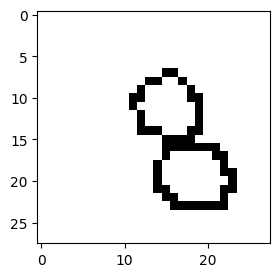

In [35]:
plt.figure(figsize = (3, 5))
plt.imshow(img)
plt.show()

# 우리가 쓴 손글씨는 흰색 배경에 검은색 글씨
# 학습 시켰던 데이터는 검은색 배경에 흰색 글씨

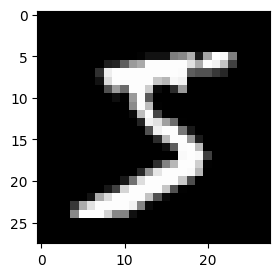

In [36]:
plt.figure(figsize = (3, 5))
plt.imshow(X_train[0], cmap = 'gray')
plt.show()

In [37]:
# 픽셀값 조정을 위해 형변환
num = np.array(img)

In [38]:
# 흰색 -> 255 -> 0(검정색)으로 만들어주어야 함
# 검정색 -> 0 -> 255(흰색)으로 만들어주어야 함

print(255 - num[0][0])
print(255 - num[15][15])

4
255


In [39]:
# 브로드 캐스팅 - 차원을 동일시 하는 기능
num = 255 - num

In [40]:
# 차원 변환
num = num.reshape(1, 28, 28)

In [41]:
num.shape

(1, 28, 28)

In [42]:
loaded_model2.predict(num)[0].argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


np.int64(2)

### CNN(Convolutional Neural Network, 합성곱 신경망)
- 합성곱 연산을 통해서 특징 찾기 -> 찾아둔 특징을 활용하여 이미지나 영상을 처리할 수 있는 딥러닝 알고리즘

In [43]:
# CNN 모델 생성하기 위한 도구 불러오기
from tensorflow.keras import Sequential # 뼈대
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Conv2D, MaxPooling2D

# Conv2D : 특징 추출부의 구성요소 중 1ea, 특징을 찾는 역할
# MaxPooling2D : 특징 추출부의 구성요소 중 1ea, 필요한 정보만 걸러내는 역할(연산량이 줄어듦)

In [51]:
from warnings import filters
# 1. 신경망 구조 설계

# 뼈대
cnn_model = Sequential()

# 입력층
cnn_model.add(InputLayer(shape = (28, 28, 1))) # 데이터 1ea의 모양 + 색상채널

# 특징추출부
cnn_model.add(Conv2D(
    filters = 32,           # 커널의 개수
    kernel_size = (3, 3),   # 커널의 사이즈
    activation = "relu",    # 활성화 함수
    padding = "same",       # 이미지자체가 작거나, 가장자리에 중요한 정보가 있는 경우 -> same 활용
                            # 이미지 자체가 너무 큰 경우(특징이 많이 잡힐 때) -> valid 활용
    strides = (2, 2)        # 커널의 보폭, 축소샘플링(불필요한 정보를 걸러냄), 양 옆/위아래로 2칸씩 커널을 이동
    ))

cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding= 'same', strides= (2,2)))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding= 'same', strides= (2,2)))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

# 분류부(출력층)
